<a href="https://colab.research.google.com/github/Nurdaylight/An-Econ-771/blob/main/PS2/ps2_Nurdaulet_Menglibayev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
from scipy.linalg import block_diag


In [2]:
ps2_data = pd.read_stata("http://fmwww.bc.edu/ec-p/data/Hayashi/nerlove63.dta")
ps2_data=np.log(ps2_data)
ps2_data['const'] = 1
ps2_data = ps2_data[['totcost', 'const', 'output', 'plabor', 'pkap', 'pfuel']]
ps2_data.head(3)

,totcost,const,output,plabor,pkap,pfuel
0,-2.501036,1,0.693147,0.737164,5.209486,2.884801
1,-0.414001,1,1.098612,0.717840,5.159055,3.558201
2,-0.010050,1,1.386294,0.717840,5.141664,3.558201


In [3]:
#Print function for nicer look
def print_estimates(betas, ses):
    for i, (b, se) in enumerate(zip(betas.flatten(), ses.flatten()), 1):
        print(f"β{i}: {b:>10.3f}   SE: {se:>10.3f}")
letters = "ABCDEFGHI"
def print_estimates1(betas, ses):
    b = betas.flatten()
    s = ses.flatten()
    n = len(b)

    z = n // 4
    b = b.reshape(z, 4)

    s = s.reshape(z, 4)
    for j in range(5):
      print("                                                          ")
      print("----------------------------------------------------->")
      for i in range(4):

            print(f"β{letters[j]},{i+1}: {b[j,i]:>10.3f}   SE: {s[j,i]:>10.3f}")



### a


Nerlove’s construction of the price of capital does **not** correspond to the theoretical concept of the user cost of capital as defined in the intertemporal investment literature. In Appendix B.4, Nerlove explicitly acknowledges that the information required to compute a true user cost—such as the opportunity cost of funds, economic depreciation, expected capital gains or losses on capital goods, and relevant tax parameters is **not available** in the data.

Instead, the price of capital is constructed as an **empirical service price proxy** based on observed accounting data on capital expenditures and capital stocks. This measure reflects an average cost of utilizing capital services rather than the marginal opportunity cost emphasized in the Hall Jorgenson framework. As such, it abstracts from forward looking behavior and treats capital input usage within a static cost minimization setting.

Nerlove justifies this construction on pragmatic grounds, noting that the objective of the analysis is the estimation of a cost function rather than an investment equation. Within this framework, the constructed capital price is intended to capture the relative cost of capital services faced by firms, not to represent a theoretically exact user cost of capital.







### b

In [4]:
#Preparing data
X = ps2_data.iloc[:, 1:].to_numpy()          # shape: (n, k)
Y = ps2_data.iloc[:, 0].to_numpy().reshape(-1, 1)

# Point estimates
inv1 =np.linalg.inv(X.T@X)
b1=inv1@ X.T@Y
# Standard errors
e=Y-X@b1
var1 = ((e.T @ e) / (140))[0] * inv1
se1= np.sqrt(np.diag(var1)).reshape(-1, 1)
print_estimates(b1, se1)



β1:     -3.527   SE:      1.774
β2:      0.720   SE:      0.017
β3:      0.436   SE:      0.291
β4:     -0.220   SE:      0.339
β5:      0.427   SE:      0.100


### c

In [5]:
X2 = X[:, 0:4].copy()
X2[:, 2:4] = X2[:, 2:4] - (X[:, 4])[:, None]

Y2=Y-(X[:,4])[:, None]


In [6]:
#restricted regression
inv2= np.linalg.inv(X2.T@X2)
b2=inv2@X2.T@Y2
out2=np.round(b2,3)

#restricted STD
e2=Y2-X2@b2
var2 = ((e2.T @ e2) / (141))[0] * inv2
se2= np.sqrt(np.diag(var2)).reshape(-1, 1)
print_estimates(b2, se2)


β1:     -4.691   SE:      0.885
β2:      0.721   SE:      0.017
β3:      0.593   SE:      0.205
β4:     -0.007   SE:      0.191


### **Answer:**


*   Yes, I am able to replicate Nerlove's results. However replication is not completely exact. There is slight margin of error for reasons specified in the question.
*   These results in his paper appear on **Table 3** Row I






### d

In [7]:
#datasplit
X3=[]
Y3=[]
ssr3=0
for i in range(5):
  print("                                                          ")
  print("----------------------------------------------------->")

  X2_1=X2[29*i:29*(i+1)]
  Y2_1=Y2[29*i:29*(i+1)]
  X3.append(X2_1)
  Y3.append(Y2_1)
  # regression
  inv3=np.linalg.inv(X2_1.T@X2_1)
  estim2=inv3@X2_1.T@Y2_1
  # STD
  e2=Y2_1-X2_1@estim2

  #The below calculates SSR over the aggregate
  ssr3+=e2.T @ e2

  #STD ctd
  var3 = ((e2.T @ e2) / (25))[0] * inv3
  se_estim2= np.sqrt(np.diag(var3 )).reshape(-1, 1)

  rts=1/estim2[1]
  #Calculating point estimates of scale economies
  print(f"Group results of {letters[i]}, estimte of RTS is: {rts.item():>10.2f}")
  print("            cofficient estimates are :")

  print_estimates(estim2, se_estim2)


                                                          
----------------------------------------------------->
Group results of A, estimte of RTS is:       2.50
            cofficient estimates are :
β1:     -3.343   SE:      3.146
β2:      0.400   SE:      0.084
β3:      0.615   SE:      0.729
β4:     -0.081   SE:      0.706
                                                          
----------------------------------------------------->
Group results of B, estimte of RTS is:       1.52
            cofficient estimates are :
β1:     -6.489   SE:      1.413
β2:      0.658   SE:      0.116
β3:      0.094   SE:      0.274
β4:      0.378   SE:      0.277
                                                          
----------------------------------------------------->
Group results of C, estimte of RTS is:       1.07
            cofficient estimates are :
β1:     -7.333   SE:      1.689
β2:      0.938   SE:      0.198
β3:      0.402   SE:      0.199
β4:      0.250   SE:      0.187
       

### Returns to scale and error variance

The estimated returns to scale **decline monotonically** across groups as output increases. The lowest-output group shows strong increasing returns to scale, while intermediate groups are close to constant returns. For the highest-output group, returns to scale fall slightly below one, mild decreasing returns at large scale.

The estimated error variance declines as output increases. Lower-output groups display greater dispersion, while higher-output groups show smaller variability, suggesting more stable and predictable cost behavior at higher levels of output.


### e  

(Proof of SSR agreement in PDF)

In [8]:
# Regression

X4 = block_diag(*X3)

# Point estimates
inv4 =np.linalg.inv(X4.T@X4)
b4=inv4@ X4.T@Y2
# Standard errors
e4=Y2-X4@b4
var4 = ((e4.T @ e4) / (len(Y2)-len(X4[0,:])))[0] * inv4
se4= np.sqrt(np.diag(var4)).reshape(-1, 1)
print_estimates1(b4, se4)


                                                          
----------------------------------------------------->
βA,1:     -3.343   SE:      1.653
βA,2:      0.400   SE:      0.044
βA,3:      0.615   SE:      0.383
βA,4:     -0.081   SE:      0.371
                                                          
----------------------------------------------------->
βB,1:     -6.489   SE:      1.826
βB,2:      0.658   SE:      0.150
βB,3:      0.094   SE:      0.354
βB,4:      0.378   SE:      0.357
                                                          
----------------------------------------------------->
βC,1:     -7.333   SE:      2.672
βC,2:      0.938   SE:      0.313
βC,3:      0.402   SE:      0.315
βC,4:      0.250   SE:      0.296
                                                          
----------------------------------------------------->
βD,1:     -6.546   SE:      3.025
βD,2:      0.912   SE:      0.279
βD,3:      0.507   SE:      0.487
βD,4:      0.093   SE:      0.426


In [9]:
# SSR calculation
ssr3
ssr4=e4.T @ e4
print(f"SUM of SSR of first models is {ssr3}")
print(f"SSR of second model is {ssr4}")
print(f"SSR difference is {(ssr4-ssr3).item():>10.6f}")

SUM of SSR of first models is [[12.2624331]]
SSR of second model is [[12.2624331]]
SSR difference is   0.000000


### f (Chow test)

In [10]:
#Restricted SSR:
ssr2=e2.T @ e2

F_score= ((ssr2-ssr4)/16)/(ssr4/(145-20))
#For F(16, 125) with α = 0.05, the critical F = 1.725
print(f"the f score is {F_score.item():>10.4f}, for F distribution with (16,125)df the critical value at 5% is 1.725, thus we can reject the null at 5%")

the f score is    -7.4529, for F distribution with (16,125)df the critical value at 5% is 1.725, thus we can reject the null at 5%


### g

In [11]:
#Preparing the data
X5 = block_diag(*[X[:, :2] for X in X3])
X5= np.hstack((X5, X2[:, 2:]))

#Y2 is the same

In [12]:
# Regression
inv5= np.linalg.inv(X5.T@X5)
b5=inv5@X5.T@Y2
out5=np.round(b5,3)

# STD
e5=Y2-X5@b5
var5 = ((e5.T @ e5) / (145-len(X5[0])))[0] * inv5
se5= np.sqrt(np.diag(var5)).reshape(-1, 1)
print_estimates(b5, se5)


β1:     -4.180   SE:      0.702
β2:      0.397   SE:      0.043
β3:     -5.052   SE:      1.125
β4:      0.648   SE:      0.147
β5:     -6.630   SE:      2.237
β6:      0.885   SE:      0.297
β7:     -6.729   SE:      2.225
β8:      0.909   SE:      0.274
β9:     -8.083   SE:      1.380
β10:      1.063   SE:      0.131
β11:      0.426   SE:      0.163
β12:      0.104   SE:      0.152


In [13]:
#new unr SSR:
ssr5=e5.T@e5
F_score= ((ssr2-ssr5)/8)/(ssr5/(145-12))


print(f"the f score is {F_score.item():>10.4f}, for F distribution with (16,125)df the critical value at 5% is 2.004 , thus we can reject the null at 5%")

the f score is   -15.8790, for F distribution with (16,125)df the critical value at 5% is 2.004 , thus we can reject the null at 5%


### h

In [14]:
Y6=[(j.item())/((0.0565 + 2.1377 / X[i,1])**0.5) for i,j in enumerate(Y2)]

In [15]:
import math
ze = math.e


X6=X.copy()


x2=X6[:,1]**2
X6 = np.insert(X6, 2, x2, axis=1)
for i in range(len(X6)):
  X6[i]=X6[i]/((0.0565 + 2.1377 / X[:,1][i])**0.5)

In [16]:

# Regression
inv6= np.linalg.inv(X6.T@X6)
b6=inv6@X6.T@Y6
out6=np.round(b6,3)

# STD
e6=Y6-X6@b6
var6 = ((e6.T @ e6).item() / (145-len(X6[0]))) * inv6
se6= np.sqrt(np.diag(var6)).reshape(-1, 1)
print_estimates(b6, se6)



β1:     -1.181   SE:      1.140
β2:      0.147   SE:      0.071
β3:      0.051   SE:      0.006
β4:      0.138   SE:      0.179
β5:     -0.380   SE:      0.212
β6:     -0.556   SE:      0.062


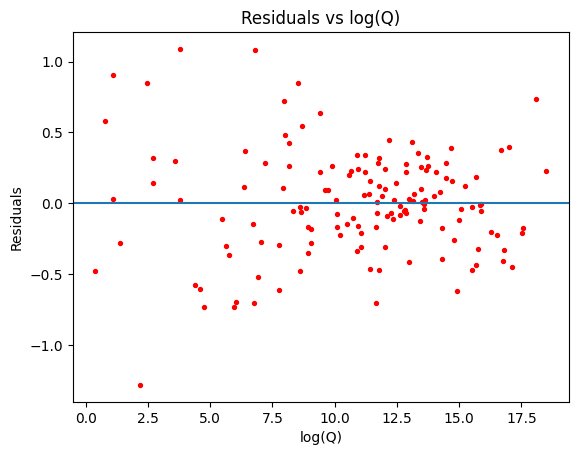

In [17]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X6[:, 1], e6, s=8,color = "red")
plt.axhline(0)
plt.xlabel(f"log(Q)")
plt.ylabel("Residuals")
plt.title(f"Residuals vs log(Q)")
plt.show()


 #### **Answer:** There still seems to be (though much weaker) evidence of heteroscdesticity under transformed variables.